# **Segmenting the market based on shopping patterns**
Let's see how to apply unsupervised learning techniques to segment the market based on customer shopping habits. ```sales.csv``` contains the sales details of a variety of tops from a number of retail clothing stores. Our goal is to identify the patterns and segment the market based on the number of units sold in these stores.

In [2]:
import csv

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Load data from input file
Load the data from the input file. Since it's a csv file, we can use the csv reader in python to read the data from this file and convert it into a ```NumPy``` array:

In [4]:
input_file = 'sales.csv'
file_reader = csv.reader(open(input_file, 'r'), delimiter=',')
X = []
for count, row in enumerate(file_reader):
    if not count:
        names = row[1:]
        continue

    X.append([float(x) for x in row[1:]])

# Convert to numpy array

In [5]:
X = np.array(X)

# Estimating the bandwidth of input data

In [6]:
bandwidth = estimate_bandwidth(X, quantile=0.8, n_samples=len(X))

# Compute clustering with MeanShift
Train a mean shift model based on the estimated bandwidth:

In [7]:
meanshift_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_model.fit(X)

,bandwidth,np.float64(26006.389359024277)
,seeds,None
,bin_seeding,True
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300


Extract the labels and the centers of each cluster:

In [8]:
labels = meanshift_model.labels_
cluster_centers = meanshift_model.cluster_centers_
num_clusters = len(np.unique(labels))

In [9]:
print("\nNumber of clusters in input data =", num_clusters)


Number of clusters in input data = 9


In [10]:
print("\nCenters of clusters:")
print('\t'.join([name[:3] for name in names]))
for cluster_center in cluster_centers:
    print('\t'.join([str(int(x)) for x in cluster_center]))


Centers of clusters:
Tsh	Tan	Hal	Tur	Tub	Swe
9823	4637	6539	2607	2228	1239
38589	44199	56158	5030	24674	4125
104972	29186	19415	16016	5060	9372
38741	40539	20120	35059	255	50710
35314	16745	12775	66900	1298	5613
28333	34263	24065	5575	4229	18076
22617	77873	32543	1005	21035	837
14987	46397	97393	1127	37315	3235
7852	4939	63081	134	40066	1332


# Extract two features for visualization 
We are dealing with six-dimensional data. In order to visualize the data, let's take twodimensional data formed using second and third dimensions:

In [11]:
cluster_centers_2d = cluster_centers[:, 1:3]

# Plot the cluster centers 

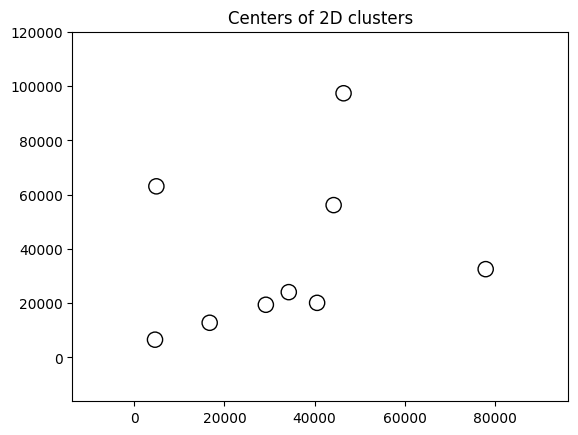

In [14]:
plt.figure()
plt.scatter(
        cluster_centers_2d[:,0], 
        cluster_centers_2d[:,1], 
        s=120, 
        edgecolors='black', 
        facecolors='none'
)

offset = 0.25
plt.xlim(
    cluster_centers_2d[:, 0].min() - offset * np.ptp(cluster_centers_2d[:, 0]),
    cluster_centers_2d[:, 0].max() + offset * np.ptp(cluster_centers_2d[:, 0])
)
plt.ylim(
    cluster_centers_2d[:, 1].min() - offset * np.ptp(cluster_centers_2d[:, 1]),
    cluster_centers_2d[:, 1].max() + offset * np.ptp(cluster_centers_2d[:, 1])
)

plt.title('Centers of 2D clusters')
plt.show()